In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
train, test = tf.keras.datasets.cifar10.load_data()

In [ ]:
def process_dataset(dataset):
  X = np.array(dataset[0]).astype(np.float32) / 128. - 1.
  Y = np.array(dataset[1]).astype(np.int64)
  return X, Y

In [ ]:
X_train, Y_train = process_dataset(train)
X_train_aug = tf.image.random_flip_left_right(X_train) #augmentacja losowa

In [ ]:
X_test, Y_test = process_dataset(test)

In [ ]:
def make_network(weight_regularizer=None, dropout_rate=0.0, classes=10, last_activation=None): #None bo jest from_logits, jakby nie było, to 'softmax'
  i = tf.keras.layers.Input(shape=[32, 32, 3], dtype=tf.float32, name="X")
  c1 = tf.keras.layers.Conv2D(filters=4, kernel_size=[3, 3], kernel_regularizer=weight_regularizer, activation="relu", padding="valid")(i)
  c2 = tf.keras.layers.Conv2D(filters=8, kernel_size=[3, 3], kernel_regularizer=weight_regularizer, activation="relu", padding="valid")(c1)
  c3 = tf.keras.layers.Conv2D(filters=8, kernel_size=[15, 15], kernel_regularizer=weight_regularizer, activation="relu", padding="valid")(c2)
  c4 = tf.keras.layers.Conv2D(filters=8, kernel_size=[1, 1], kernel_regularizer=weight_regularizer, activation="relu", padding="valid")(c3)
  # b1 = tf.keras.layers.BatchNormalization()(c3) #normalizacja
  m1 = tf.keras.layers.MaxPool2D()(c2) #max_pool
  # cc2 = tf.keras.layers.Conv2D(
  #     filters=64, 
  #     kernel_size=[2, 2], 
  #     kernel_regularizer=weight_regularizer, 
  #     activation="relu", 
  #     strides=(2,2), 
  #     padding="valid"
  # )(b1) konwolucja
  con1 = tf.keras.layers.Add()([m1, c4]) #add
  c5 = tf.keras.layers.Conv2D(filters=16, kernel_size=[3, 3], kernel_regularizer=weight_regularizer, activation="relu", padding="valid")(con1)
  c6 = tf.keras.layers.Conv2D(filters=16, kernel_size=[7, 7], kernel_regularizer=weight_regularizer, activation="relu", padding="valid")(c5)
  c7 = tf.keras.layers.Conv2D(filters=16, kernel_size=[1, 1], kernel_regularizer=weight_regularizer, activation="relu", padding="valid")(c6)
  m2 = tf.keras.layers.MaxPool2D()(c5)
  con2 = tf.keras.layers.Add()([m2, c7])  
  fl1 = tf.keras.layers.Flatten()(con2)
  d1 = tf.keras.layers.Dense(units=64, activation="tanh")(fl1)
  drop1 = tf.keras.layers.Dropout(rate=dropout_rate)(d1)
  d2 = tf.keras.layers.Dense(units=classes, activation=last_activation, name="y")(drop1)
  return tf.keras.Model(i, d2)

In [ ]:
m1 = make_network(dropout_rate=0.2)

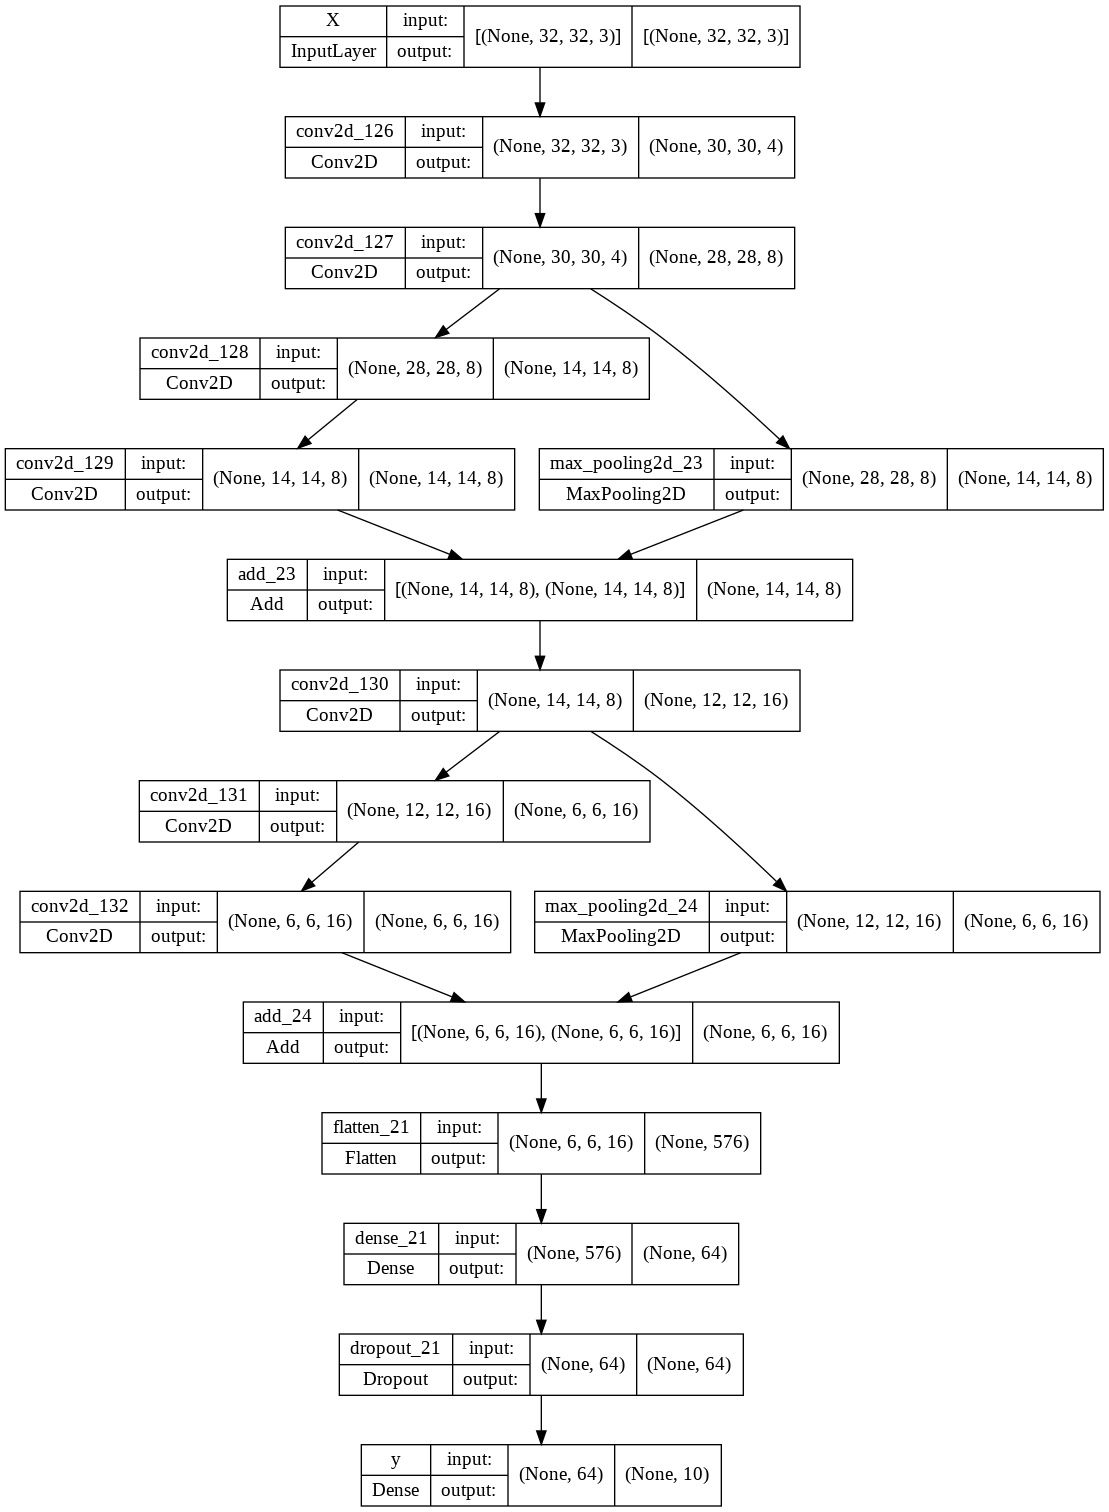

In [ ]:
tf.keras.utils.plot_model(m1, show_shapes=True)

In [ ]:
m1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)) #okreslenie logits #okreslenie learning rate 
training1 = m1.fit(X_train_aug[:150], Y_train[:150], batch_size=16, epochs = 20, validation_data=(X_test[:150], Y_test[:150])) #okreslenie epok

Epoch 1/20
10/10 [==============================] - 3s 198ms/step - loss: 1.7196 - val_loss: 1.9347
Epoch 2/20
10/10 [==============================] - 1s 137ms/step - loss: 1.6802 - val_loss: 1.8976
Epoch 3/20
10/10 [==============================] - 1s 137ms/step - loss: 1.6433 - val_loss: 1.9139
Epoch 4/20
10/10 [==============================] - 1s 143ms/step - loss: 1.5952 - val_loss: 1.9082
Epoch 5/20
10/10 [==============================] - 1s 140ms/step - loss: 1.5756 - val_loss: 1.9325
Epoch 6/20
10/10 [==============================] - 1s 129ms/step - loss: 1.5611 - val_loss: 1.8872
Epoch 7/20
10/10 [==============================] - 2s 155ms/step - loss: 1.5099 - val_loss: 1.9150
Epoch 8/20
10/10 [==============================] - 1s 137ms/step - loss: 1.5060 - val_loss: 1.9051
Epoch 9/20
10/10 [==============================] - 1s 137ms/step - loss: 1.4757 - val_loss: 1.9229
Epoch 10/20
10/10 [==============================] - 2s 153ms/step - loss: 1.4469 - val_loss: 1.8930

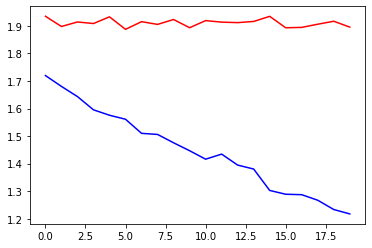

In [ ]:
plt.plot(training1.history['loss'],c="b")
plt.plot(training1.history['val_loss'], c="r") #sieć jest przeuczona

In [ ]:
pred_test = m1.predict(X_test[0:2000])

In [ ]:
np.argmax(pred_test, axis = -1)
wynik_pred = np.argmax(pred_test, axis = -1)
wynik_pred = np.squeeze(wynik_pred)

In [ ]:
pred_test[0,Y_test[0]]

array([1.6045316], dtype=float32)

In [ ]:
wynik_znany = Y_test[0:2000]
wynik_znany = np.squeeze(wynik_znany)

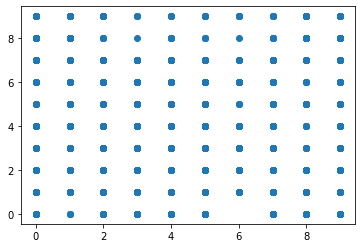

In [ ]:
plt.scatter(wynik_znany, wynik_pred)

(array([[73., 18., 18.,  6.,  7.,  5.,  6., 13., 28., 22.],
        [ 3., 79., 13., 10.,  9.,  8.,  7.,  6., 15., 48.],
        [17., 12., 46., 14., 62.,  6., 17.,  9.,  4.,  8.],
        [ 8., 17., 35., 50., 25., 14., 27., 19.,  1.,  3.],
        [12., 11., 46., 20., 60.,  8., 18., 14.,  5.,  4.],
        [ 9.,  9., 49., 42., 27., 17., 16.,  8.,  3.,  5.],
        [ 0.,  8., 21., 18., 73.,  3., 83.,  4.,  1.,  5.],
        [17., 10., 32., 22., 26., 13., 13., 50.,  5.,  5.],
        [27., 34.,  9.,  5.,  4.,  8.,  4.,  7., 68., 51.],
        [12., 64., 12.,  7.,  7.,  9.,  8.,  7., 12., 65.]]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <matplotlib.collections.QuadMesh at 0x7f10a1f37c90>)

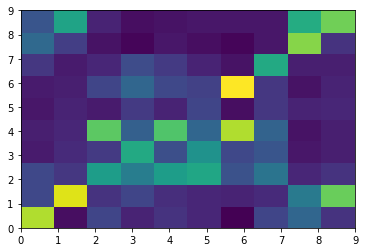

In [ ]:
plt.hist2d(wynik_znany, wynik_pred)